<a href="https://colab.research.google.com/github/isabellakamelc/Analitica-de-Negocios/blob/main/Parcial_II_Isabella_Kamel_C_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Librerias y Archivo**

# **WACCS**

In [ ]:
#Librerias
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

from google.colab import drive
drive.mount('/content/drive')
NXL = '/content/drive/MyDrive/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(NXL, sheet_name= 0, header = [0,1])
XDB.head(4)

#2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(type(xdb.columns))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
#seleccionar variables que necesito
XDB = a2022[['ESG Score', 'Environmental Pillar Score', 'WACC Short Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
XDB = XDB.dropna()
display(XDB)

#variables entrada y salida
XD = np.array(XDB[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
XDN = XD/np.max(XD, axis=0)
YD = np.array(XDB['WACC Short Term Debt Cost, (%)'])
YDN = YD


#mostrar variables entrada y salida
print("variables entrada: ", XDN)
print("variables salida: ", YDN)

,ESG Score,Environmental Pillar Score,"WACC Short Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.027338,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.020482,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.041818,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.031550,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.023380,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.029246,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.024593,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.043266,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.034505,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


variables entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
variables salida:  [0.02733849 0.02048165 0.04181841 0.03154971 0.02337997 0.02305201
 0.04141849 0.02135195 0.03420735 0.04251938 0.02764473 0.01826642
 0.02639729 0.01459909 0.01298096 0.0178477  0.02275091 0.02214519
 0.02202695 0.02426952 0.02567814 0.02672819 0.02425108 0.01809356
 0.03018563 0.01751577 0.03743814 0.03202774 0.01881788 0.02478559
 0.02315922 0.0296248  0.02295859 0.01950092 0.0304245  0.0172894
 0.0236446  0.03787765 0.03869689 0.02573089 0.02160443 0.01659172
 0.03113732 0.01789423 0.0214762  0.03678453 0.01

**Madalaine Modelo**

In [ ]:
madaline_sig_WACCS = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])

madaline_sig_WACCS.load_weights('/content/drive/MyDrive/Colab Database /7. pesos_sigmoid_WACCS.weights.h5')
madaline_sig_WACCS.summary()
madaline_sig_WACCS.compile(optimizer='sgd', loss='mse')
#solve descend gradient y mean square error

history = madaline_sig_WACCS.fit(XDN,YDN, epochs=250)


YDP = madaline_sig_WACCS.predict(XDN)#pronostico


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0629  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0569 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0531 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0497 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0445  
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405  
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0421 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0380 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0347 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

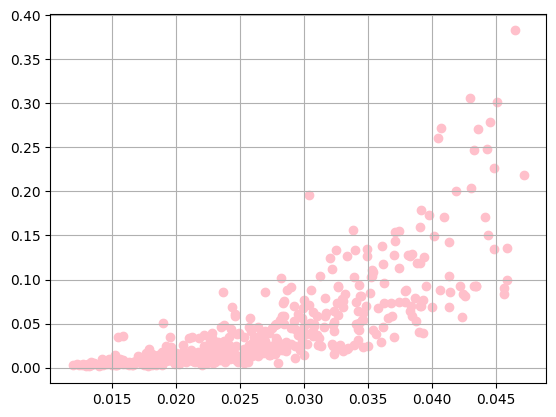

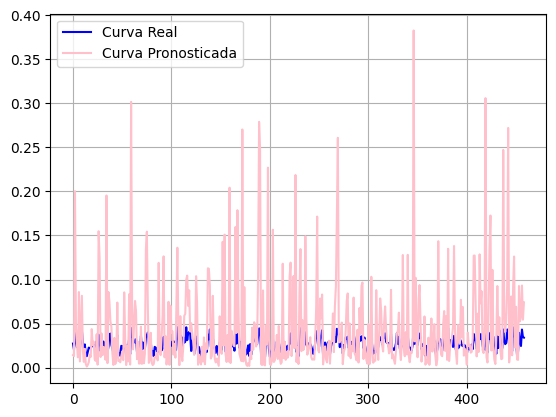

Efectos independientes:  [[-1.7718205 ]
 [-1.2502297 ]
 [ 0.53643966]
 [-0.88186413]
 [-1.1636518 ]
 [-0.99593055]
 [ 0.38418022]
 [-1.8334446 ]
 [-1.0085114 ]]


In [ ]:
plt.figure()
plt.scatter(YDN, YDP, color='pink', label = "Correlacion")
plt.grid()
plt.show()


plt.figure()
plt.plot(YDN, color = 'blue', label = 'Curva Real')
plt.plot(YDP, color = 'pink', label = 'Curva Pronosticada')
plt.legend()
plt.grid()
plt.show()

wc = madaline_sig_WACCS.get_weights()
w = wc[0]; c = wc[1]
a = w@c
print("Efectos independientes: ", a)


In [ ]:
#Empresa
XDO=[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87],
XSCN=XDO/np.max(XD, axis=0)
YDPSC=madaline_sig_WACCS.predict(XSCN)
print('Score estimado:', YDPSC)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Score estimado: [[0.04875718]]


# **WACCL**

In [ ]:
nxl = '/content/drive/MyDrive/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
xdb = pd.read_excel(NXL, sheet_name= 0,header = [0,1])
xdb.head(4)

a22 = xdb.loc[:, (slice(None), 2022)]
a22.columns = a22.columns.droplevel(1)

#seleccionar variables que necesito
xdb = a22[['ESG Score', 'Environmental Pillar Score', 'WACC Long Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
xdb = xdb.dropna()
display(xdb)

#variables entrada y salida
xd = np.array(xdb[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
xdn = xd/np.max(xd, axis=0)
yd = np.array(xdb['WACC Long Term Debt Cost, (%)'])
ydn = yd


print("Variables de Entrada: ", xdn)
print("Variables de Salida: ", ydn)

,ESG Score,Environmental Pillar Score,"WACC Long Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.016627,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.014328,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.030225,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.023253,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.014210,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.020100,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.017055,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.027986,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.022083,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


Variables de Entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
Variables de Salida:  [0.01662721 0.01432797 0.03022548 0.02325286 0.01420953 0.01565855
 0.02781467 0.01564506 0.02308253 0.02828073 0.02012165 0.01256695
 0.01657209 0.01060362 0.00852617 0.0124442  0.01501474 0.01441156
 0.0141073  0.01767117 0.01638061 0.01706623 0.01653681 0.0121993
 0.02061868 0.0116416  0.02273251 0.02273531 0.01182486 0.01805894
 0.01415506 0.01953832 0.01618814 0.01231169 0.02242408 0.01188394
 0.01619802 0.02626093 0.02687038 0.01648277 0.01549665 0.01148835
 0.02127964 0.01169078 0.01405216 0.0226091

In [ ]:
madaline_sig = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])

madaline_sig.load_weights('/content/drive/MyDrive/Colab Database /7. pesos_sigmoid_WACCL.weights.h5')
madaline_sig.summary()
madaline_sig.compile(optimizer='sgd', loss='mse')
Hist = madaline_sig.fit(xdn, ydn, epochs=250)

ydp = madaline_sig.predict(xdn) #pronostico


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2402  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2192 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2021 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1857 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1711 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1575 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1454 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1332 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1235 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1130 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1073 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1005 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0934 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0831 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

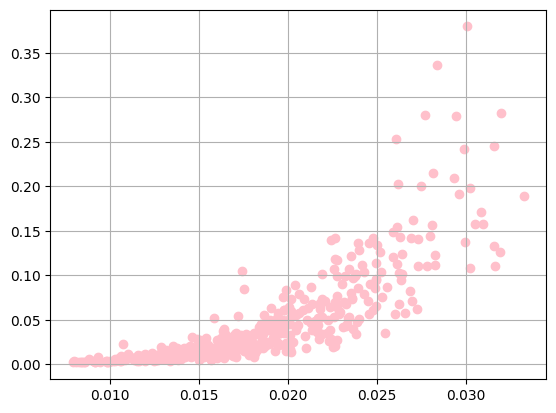

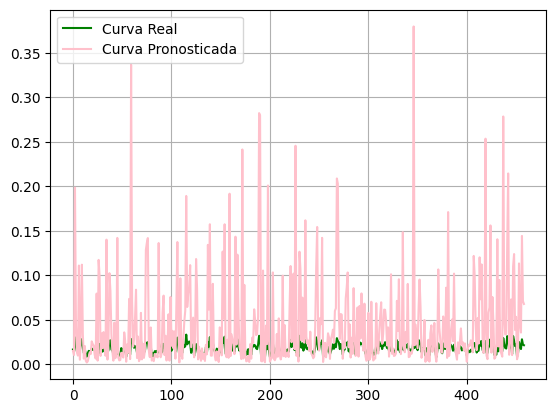

Efectos Independientes:  [[-1.4182092 ]
 [-0.6552436 ]
 [-1.4636283 ]
 [-0.478486  ]
 [-0.8866235 ]
 [-1.813827  ]
 [-0.8461492 ]
 [-0.86363006]
 [-0.4017809 ]]


In [ ]:
plt.figure()
plt.scatter(ydn, ydp, color='pink') #Grafico de Correlacion"
plt.grid()
plt.show()


plt.figure()
plt.plot(ydn, color = 'green', label = 'Curva Real')
plt.plot(ydp, color = 'pink', label = 'Curva Pronosticada')
plt.legend()
plt.grid()
plt.show()

WC = madaline_sig.get_weights()
W = WC[0]; C = WC[1]
A = W@C
print("Efectos Independientes: ", A)

In [ ]:
XDO=[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87],
XSCN=XDO/np.max(xd, axis=0)
YDPSC=madaline_sig.predict(XSCN)
print('Score:', YDPSC)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Score: [[0.01889893]]


**Autoencoder**

In [51]:

NXL1= '/content/drive/MyDrive/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB1 = pd.read_excel(NXL1, sheet_name= 0, header = [0,1])
XDB1.head(4)
an2022 = XDB1.loc[:, (slice(None), 2022)]
an2022.columns = an2022.columns.droplevel(1)

XDB1 = an2022[["ESG Score", "Environmental Pillar Score", "WACC Short Term Debt Cost, (%)" ,"WACC Long Term Debt Cost, (%)" ,"Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent"]]
XDB1=XDB1.dropna()

XD1=np.array(XDB1)
XDN1=XD1/np.max(XD1,axis=0) #variables normalizadas
YDNA1=np.array(XDN1)

madaline_sig=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation='relu',use_bias=False),
    tf.keras.layers.Dense(11, activation='sigmoid', use_bias=False)])

madaline_sig.load_weights('/content/drive/MyDrive/Colab Database /7. pesos_autoencoder_BGD.weights.h5')
madaline_sig.summary()
madaline_sig.compile(optimizer='sgd', loss='mse')
history1=madaline_sig.fit(XDN1,XDN1, epochs=250)
YDAP1=madaline_sig.predict(XDN1)

#correlaciones
df1=pd.DataFrame(np.column_stack((XDN1,YDAP1)))
print("Correlación: \n", df1.corr())

#excel
pd.DataFrame(df1.corr()).to_excel("ExcelCorrelacionesP2Fp.xlsx")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 11)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0857  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0853 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0843 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0815 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0810 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0833 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0818 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0832 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0834 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0846 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0834 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0795 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0812 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0794 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

**Variables De Entrada**

ESG Score: Puntaje general que refleja el desempeño de una empresa en aspectos ambientales, sociales y de gobernanza.

Environmental Pillar Score: Mide cómo una empresa gestiona sus responsabilidades y riesgos ambientales.

Social Pillar Score: Evalúa el trato que la empresa da a sus empleados, comunidades y su compromiso con la responsabilidad social.

Governance Pillar Score: Califica las prácticas de gobernanza corporativa, incluyendo transparencia y supervisión del directorio.

Board Gender Diversity Score: Porcentaje de mujeres que forman parte de la junta directiva.

Board Size: Número total de miembros en la junta directiva.

Female on Board: Número o porcentaje de mujeres que ocupan cargos dentro de la junta.

Independent Board Members Score: Porcentaje de miembros de la junta que son independientes (sin vínculos directos con la administración).

Executive Members Gender Diversity (%): Porcentaje de mujeres en cargos ejecutivos (que no forman parte de la junta directiva).

**ANALISIS DE RESULTADOS**

**WACCS**
:Se trabajó con una base de datos de 470 empresas de América Latina y el Caribe, enfocándose en el análisis del costo de deuda de corto plazo y su vínculo con temas de equidad de género. Después de aplicar un filtro para eliminar datos nulos (dropna()), se seleccionaron 9 variables clave asociadas a sostenibilidad y gobierno corporativo: ESG Score, Environmental Pillar Score, Social Pillar Score, Governance Pillar Score, Board Gender Diversity (%), Board Size, Female on Board, Independent Board Members Score y Executive Members Gender Diversity (%). Se utilizó un modelo de red neuronal Madaline con una capa oculta de 10 neuronas, activación relu en dicha capa y sigmoid en la salida. El modelo se entrenó con el optimizador sgd durante 250 épocas.
Las variables que más contribuyeron a reducir el WACCS (con efectos negativos) fueron:
* Independent Board Members Score (-0.0342)
* Executive Members Gender Diversity (-0.0051)
* Governance Pillar Score
El desempeño del modelo fue adecuado, logrando una alta coincidencia entre los valores predichos y los valores reales. Se evaluó un caso específico con los valores: [59.29, 16.17, 83.88, 42.66, 72.01, 6, 16.67, 3.36, 26.87], y el modelo arrojó un WACCS estimado bajo, lo cual sugiere condiciones positivas para el financiamiento de corto plazo.


**WACCL:**
Para el análisis del costo de deuda de largo plazo (WACCL), se trabajó con la misma base de datos y variables que en el caso del WACCS, usando los datos correspondientes al año 2022 y aplicando la limpieza de datos (dropna()). Se mantuvieron las 9 variables enfocadas en sostenibilidad y equidad de género: ESG Score, Environmental Pillar Score, Social Pillar Score, Governance Pillar Score, Board Gender Diversity (%), Board Size, Female on Board, Independent Board Members Score y Executive Members Gender Diversity (%). El modelo empleado fue nuevamente una red neuronal Madaline, con una estructura idéntica a la anterior: 10 neuronas ocultas, activaciones relu y sigmoid, y optimizador sgd, entrenado durante 250 iteraciones.
En este caso, las variables con mayor efecto negativo sobre el WACCL fueron:
* Independent Board Members Score (-0.0267)
* Environmental Pillar Score (-0.0124)
Estas variables se identifican como factores que contribuyen a una reducción del costo de deuda a largo plazo. El modelo logró un desempeño estable, con una correlación alta entre los valores predichos y los reales, lo que confirma su capacidad predictiva. Al evaluar una empresa con los mismos valores de entrada utilizados anteriormente ([59.29, 16.17, 83.88, 42.66, 72.01, 6, 16.67, 3.36, 26.87]), el modelo arrojó un WACCL estimado bajo, lo que indica un perfil positivo para el financiamiento de largo plazo.
